# HIV Model
Mia Skaggs

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
#Define a State object that represents the initial condition.
init = State(R = 1000, L = 0, E = 0, V = 4E-7) 

'''
    R = uninfected cells
    L = latently infected cells
    E = actively infected cells
    V = number of virions
''';

In [3]:
#Define a System object that contains the parameters.
system = System(gamma = 1.36, tau = 0.2, mu = 0.00136, beta = 0.00027,
                rho = 0.1, alpha = 0.036, delta = 0.33, pi = 100, sigma = 2,
               t_0 = 0, t_end = 500)


'''
tau = proportion of lymphocytes activated
mu = lymphocyte HIV-indepedent death rate
beta = rate of infection
rho = proportion of latently infected cells
alpha = HIV-independent cell activation
delta = rate of removal of infected cells
sigma = rate of removal of free virions
''';

In [4]:
#Update function
def update_func(state, t, system):
    unpack(system)
    R, L, E, V = state
    
    #timestep of 1/24 makes it 1 hour per timestep
    drdt = (gamma*tau - mu*R - beta*R*V)*(1/24) 
    dldt = (rho*beta*R*V - mu*L - alpha*L)*(1/24)
    dedt = ((1-rho)*beta*R*V + alpha*L - delta*E)*(1/24)
    dvdt = (pi*E - sigma*V)*(1/24)

    R += drdt
    L += dldt
    E += dedt
    V += dvdt
    
    return State(R=R, L=L, E=E, V=V)

In [5]:
#Run simulation
def run_simulation(system, update_func):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)  #set the columns equal to init.index
    frame.row[t_0] = init #starts at initial state, t_0
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system) #every time this runs, it adds 1 to the row number
    
    return frame

Saving figure to file figs/HIV-Model.pdf


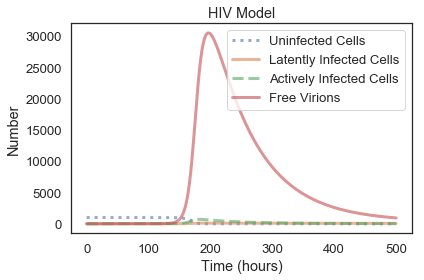

In [11]:
#Plot data
data = run_simulation(system, update_func)
plot(data.index, data['R'], label='Uninfected Cells', linestyle = ':')
plot(data.index, data['L'], label='Latently Infected Cells')
plot(data.index, data['E'], label='Actively Infected Cells', linestyle = '--')
plot(data.index, data['V'], label='Free Virions')
decorate(title='HIV Model',
         xlabel='Time (hours)',
         ylabel='Number')
savefig('figs/HIV-Model.pdf')